# Exploratory Data Analysis (EDA)

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# Read the training data
train_data = pd.read_csv('dataset/train.csv')

print("\nDataset Shape:", train_data.shape)
print("\nColumns:", train_data.columns.tolist())
train_data


Dataset Shape: (20000, 17)

Columns: ['id', 'temperature', 'irradiance', 'humidity', 'panel_age', 'maintenance_count', 'soiling_ratio', 'voltage', 'current', 'module_temperature', 'cloud_coverage', 'wind_speed', 'pressure', 'string_id', 'error_code', 'installation_type', 'efficiency']


,id,temperature,irradiance,humidity,panel_age,maintenance_count,soiling_ratio,voltage,current,module_temperature,cloud_coverage,wind_speed,pressure,string_id,error_code,installation_type,efficiency
0,0,7.817315,576.179270,41.24308670850264,32.135501,4.0,0.803199,37.403527,1.963787,13.691147,62.494044,12.82491203459621,1018.8665053152533,A1,NaN,NaN,0.562096
1,1,24.785727,240.003973,1.3596482765960705,19.977460,8.0,0.479456,21.843315,0.241473,27.545096,43.851238,12.012043660984917,1025.6238537572883,D4,E00,dual-axis,0.396447
2,2,46.652695,687.612799,91.26536837560256,1.496401,4.0,0.822398,48.222882,4.191800,43.363708,NaN,1.814399755560454,1010.9226539809573,C3,E00,NaN,0.573776
3,3,53.339567,735.141179,96.19095521176159,18.491582,3.0,0.837529,46.295748,0.960567,57.720436,67.361473,8.736258932034128,1021.8466633134253,A1,NaN,dual-axis,0.629009
4,4,5.575374,12.241203,27.495073003585226,30.722697,6.0,0.551833,0.000000,0.898062,6.786263,3.632000,0.52268384077164,1008.5559577591927,B2,E00,fixed,0.341874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19995,16.868428,NaN,93.53031757838667,14.393967,3.0,0.738911,12.147711,3.005355,26.206810,1.733013,12.594122273332914,1018.3744670739436,B2,E02,tracking,0.664907
19996,19996,53.415061,296.970303,93.98571391279083,25.997012,2.0,0.513061,0.000000,0.532119,65.000000,64.558667,0.9769909288128159,1016.081102065643,D4,E00,fixed,0.354070
19997,19997,2.442727,660.328019,37.9689180401391,32.818396,9.0,0.548602,13.047950,4.075498,11.584869,57.730134,4.750937249871706,1009.6844614602336,D4,NaN,tracking,0.419734
19998,19998,NaN,632.760700,43.01470184078199,19.063517,4.0,NaN,0.000000,1.068906,21.149351,78.123689,11.304158443374758,1006.6738746072241,A1,E00,tracking,0.661963


## Data Summary and Statistics

In [20]:
# Display basic information about the dataset
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  20000 non-null  int64  
 1   temperature         18999 non-null  float64
 2   irradiance          19013 non-null  float64
 3   humidity            20000 non-null  object 
 4   panel_age           18989 non-null  float64
 5   maintenance_count   18973 non-null  float64
 6   soiling_ratio       18990 non-null  float64
 7   voltage             19007 non-null  float64
 8   current             19023 non-null  float64
 9   module_temperature  19022 non-null  float64
 10  cloud_coverage      18990 non-null  float64
 11  wind_speed          20000 non-null  object 
 12  pressure            20000 non-null  object 
 13  string_id           20000 non-null  object 
 14  error_code          14088 non-null  object 
 15  installation_type   14972 non-null  object 
 16  effi

Need to change datatypes of elements which are either float/integer but present as object
i.e Humidity, wind_speed, pressure

In [21]:
# Convert columns from object to numeric types
train_data['humidity'] = pd.to_numeric(train_data['humidity'], errors='coerce')
train_data['wind_speed'] = pd.to_numeric(train_data['wind_speed'], errors='coerce')
train_data['pressure'] = pd.to_numeric(train_data['pressure'], errors='coerce')

After converting these columns, we can verify the changes with `train_data.info()`

In [22]:
train_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  20000 non-null  int64  
 1   temperature         18999 non-null  float64
 2   irradiance          19013 non-null  float64
 3   humidity            19873 non-null  float64
 4   panel_age           18989 non-null  float64
 5   maintenance_count   18973 non-null  float64
 6   soiling_ratio       18990 non-null  float64
 7   voltage             19007 non-null  float64
 8   current             19023 non-null  float64
 9   module_temperature  19022 non-null  float64
 10  cloud_coverage      18990 non-null  float64
 11  wind_speed          19881 non-null  float64
 12  pressure            19865 non-null  float64
 13  string_id           20000 non-null  object 
 14  error_code          14088 non-null  object 
 15  installation_type   14972 non-null  object 
 16  effi

In [23]:
# Display statistical summary
train_data.describe()

,id,temperature,irradiance,humidity,panel_age,maintenance_count,soiling_ratio,voltage,current,module_temperature,cloud_coverage,wind_speed,pressure,efficiency
count,20000.000000,18999.000000,19013.000000,19873.000000,18989.000000,18973.000000,18990.000000,19007.000000,19023.000000,19022.000000,18990.000000,19881.000000,19865.000000,20000.000000
mean,9999.500000,25.077241,501.273896,50.066170,17.509758,4.012070,0.698879,16.242251,1.713396,29.923807,51.378575,7.413225,1012.981286,0.510260
std,5773.647028,12.513129,250.926590,28.709656,10.097557,2.002268,0.172244,17.889031,1.152953,12.125405,48.473664,4.329861,10.046245,0.140420
min,0.000000,0.000000,-597.278646,0.010714,0.001264,0.000000,0.400149,0.000000,0.000054,0.000000,0.000244,0.001277,970.087365,0.000000
25%,4999.750000,16.853522,332.227277,25.273574,8.777905,3.000000,0.550654,0.000000,0.772311,21.522124,25.081618,3.668529,1006.187799,0.445613
50%,9999.500000,24.720345,499.654730,50.224152,17.497731,4.000000,0.697663,12.350138,1.558413,29.857669,49.704133,7.396091,1012.906121,0.515709
75%,14999.250000,32.848917,668.416734,74.513994,26.340761,5.000000,0.847838,26.557322,2.474744,38.094943,75.052824,11.158582,1019.786203,0.590324
max,19999.000000,147.394168,1537.810349,99.995202,34.998379,15.000000,0.999949,494.279016,7.315597,65.000000,1000.000000,14.999448,1052.865715,0.987066


## Missing Values Analysis

In [24]:
 # Check missing values
missing_values = train_data.isnull().sum()
missing_pct = (missing_values / len(train_data)) * 100

missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_pct
})
missing_df[missing_df['Missing Values'] > 0]

,Missing Values,Percentage
temperature,1001,5.005
irradiance,987,4.935
humidity,127,0.635
panel_age,1011,5.055
maintenance_count,1027,5.135
soiling_ratio,1010,5.050
voltage,993,4.965
current,977,4.885
module_temperature,978,4.890
cloud_coverage,1010,5.050


## Numerical Features Distribution

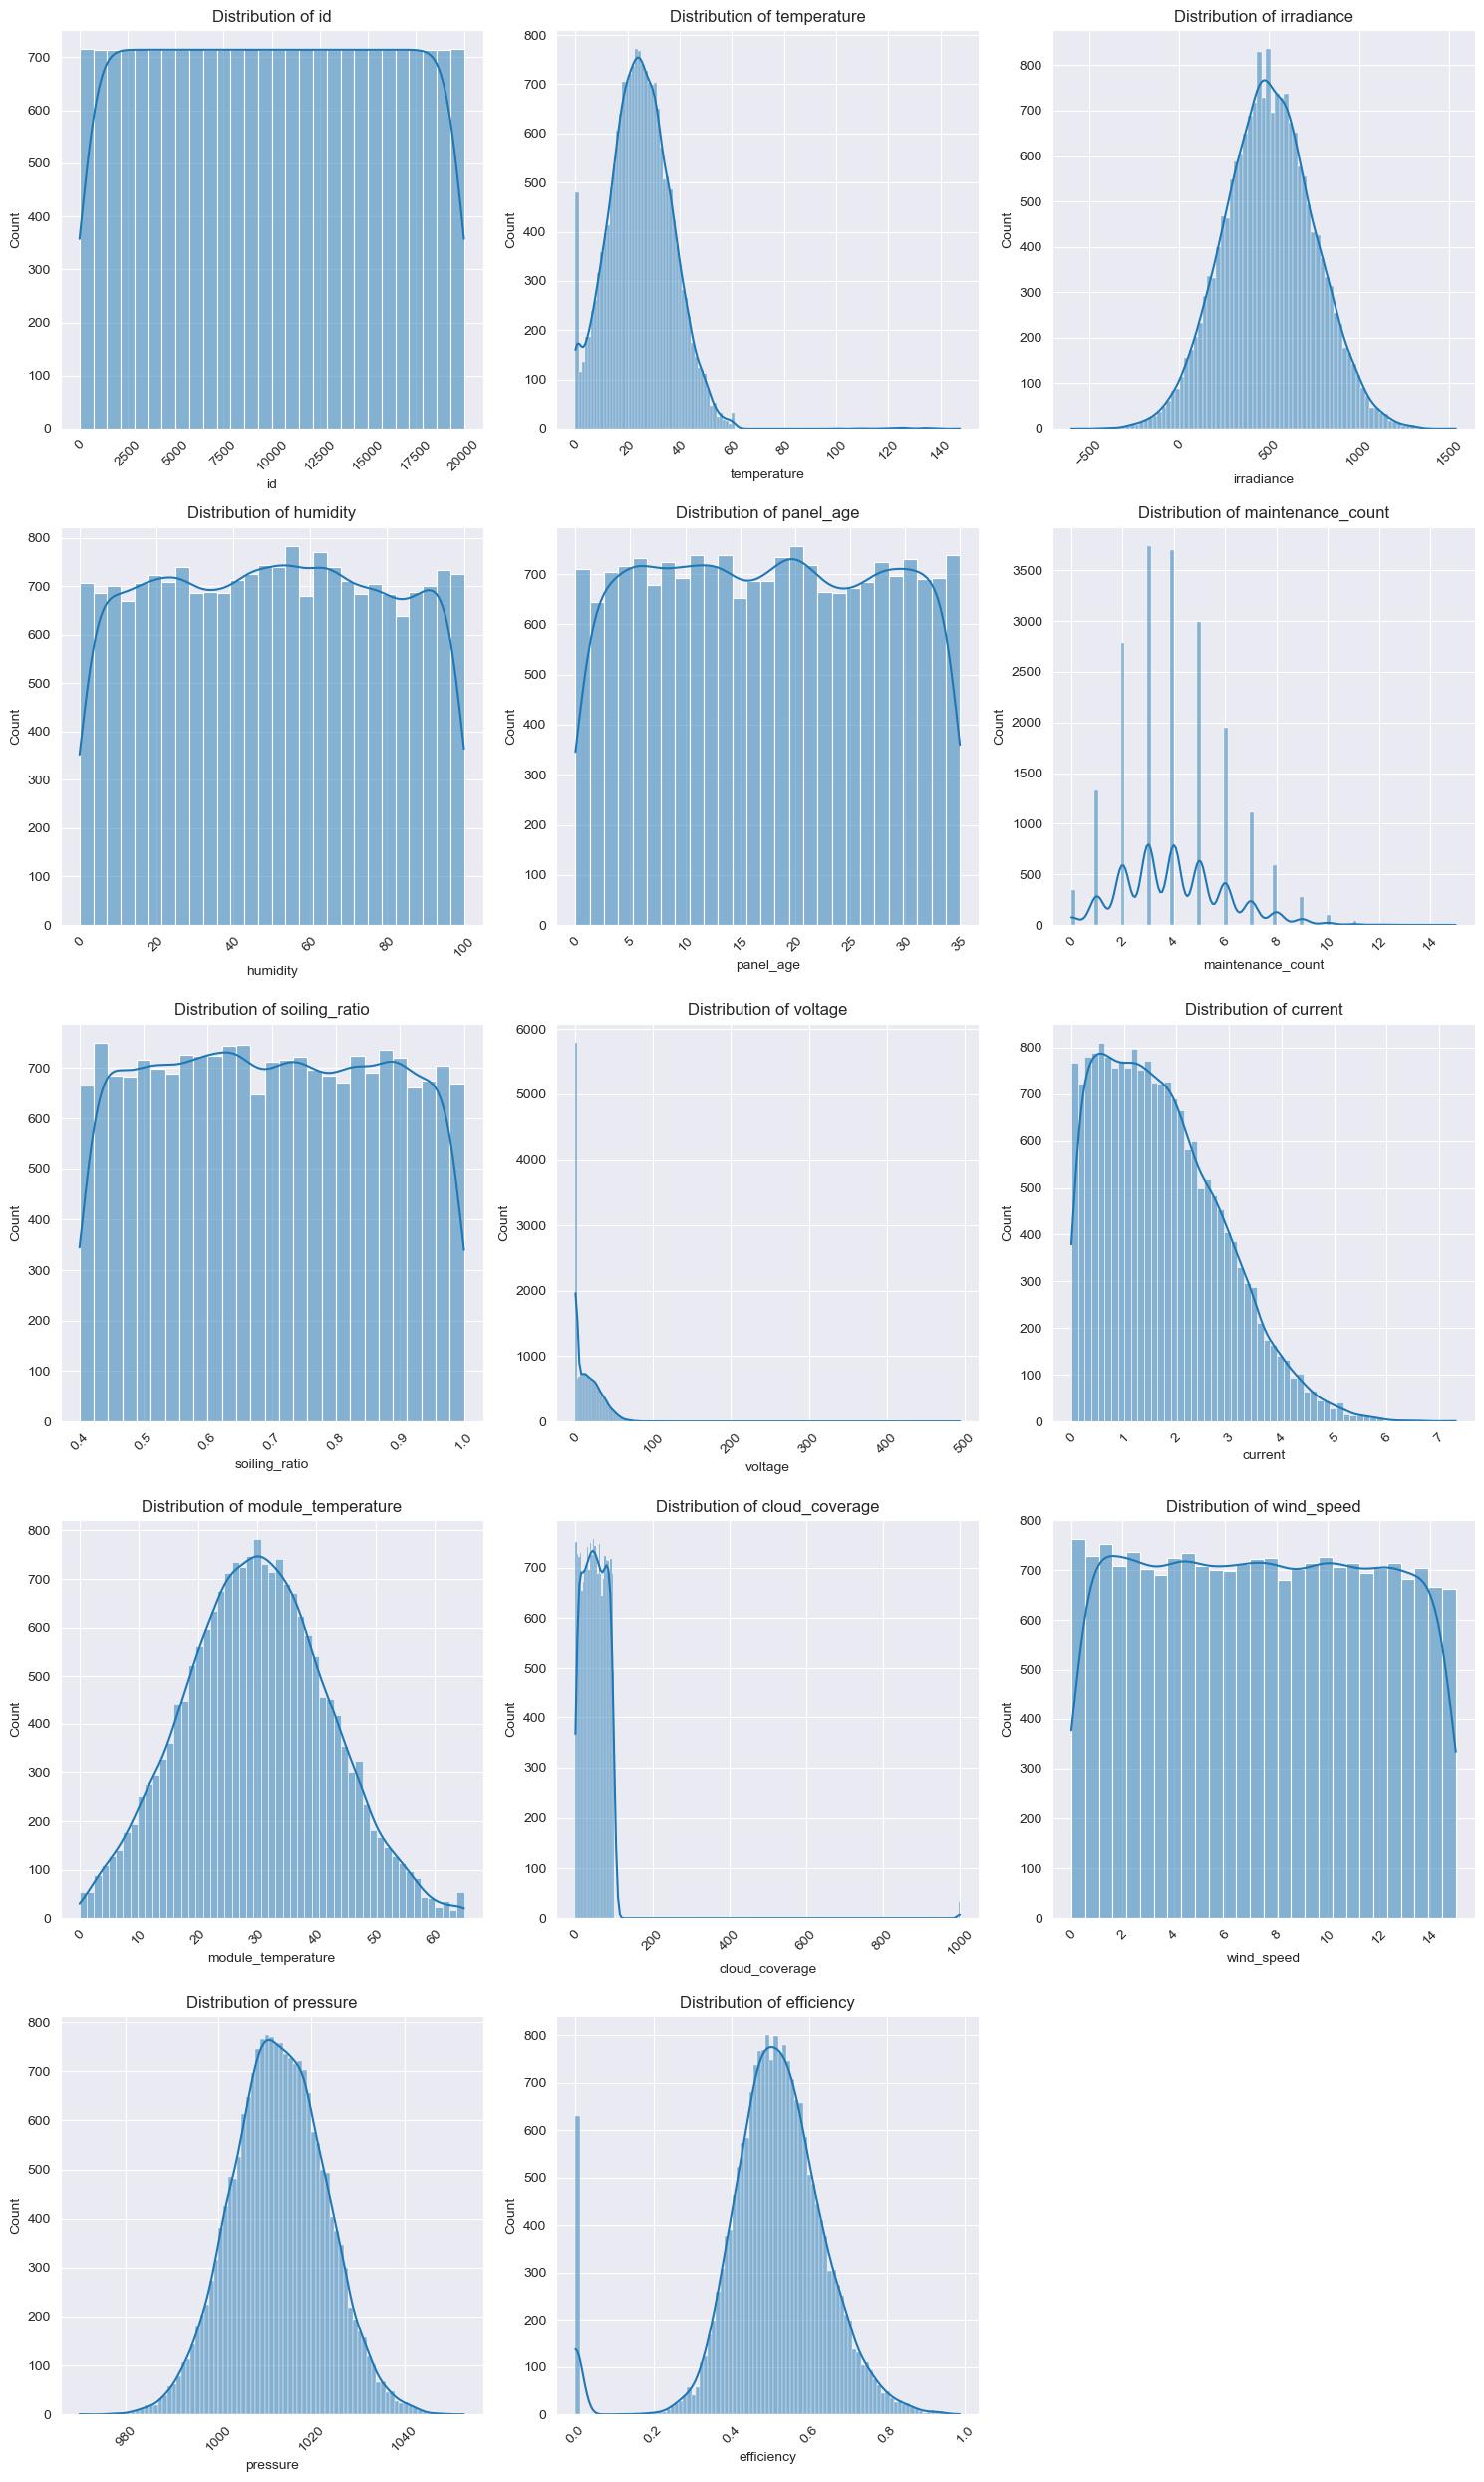

In [25]:
# Select numerical columns
numerical_cols = train_data.select_dtypes(include=['int64', 'float64']).columns

# Create distribution plots for numerical features
plt.figure(figsize=(15, 5 * ((len(numerical_cols) + 2) // 3)))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(((len(numerical_cols) + 2) // 3), 3, i)
    sns.histplot(train_data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Categorical Features Analysis

## Correlation Analysis

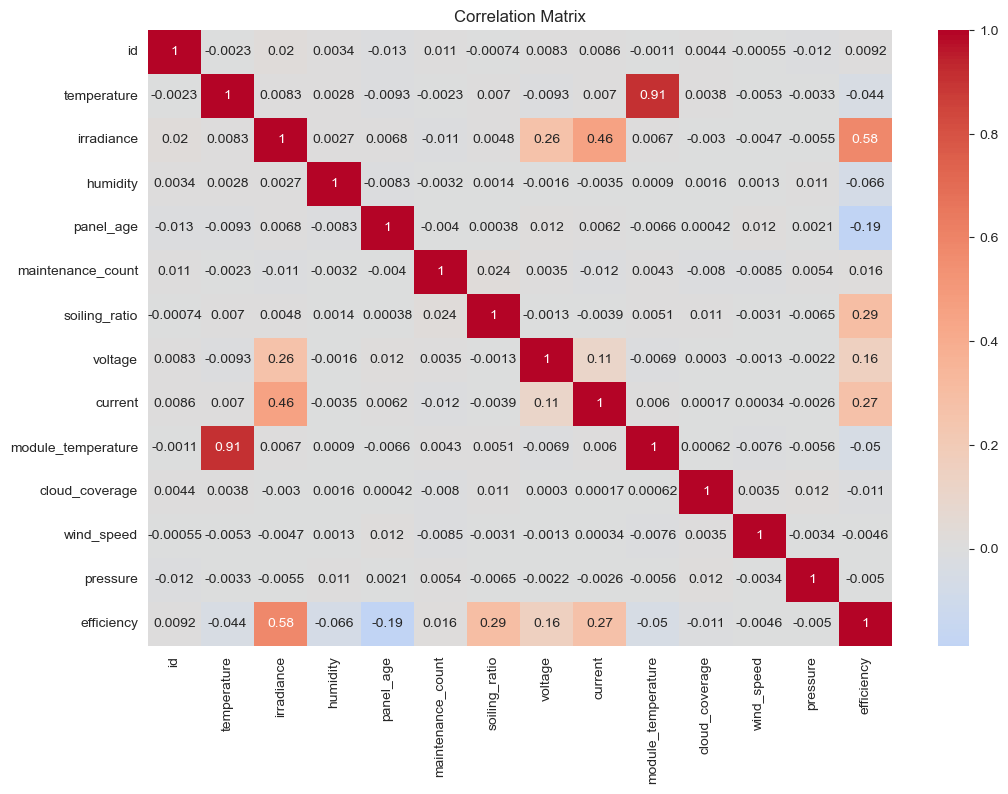

In [26]:
# Calculate correlation matrix for numerical features
correlation_matrix = train_data[numerical_cols].corr()

# Create heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()
